In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
sigcol = ObjIter(['tab:blue','tab:green','tab:orange'])

In [19]:
module = fc.eightb.preselection.ranked_quadh_lowm

signal_lowm = ObjIter([Tree(fn, use_gen=True) for fn in module.signal_list[::3]])
signal_higm = ObjIter([Tree(fn, use_gen=False) for fn in fc.eightb.preselection.ranked_quadh.signal_list[::3]])
signal_asym = ObjIter([Tree(fn) for fn in fc.eightb.preselection.t8btag_minmass.signal_list[::3]])


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


In [20]:
def set_color(args): 
  t, c = args
  t.color = c
signal_lowm.zip(sigcol).apply(set_color)
signal_higm.zip(sigcol).apply(set_color)
signal_asym.zip(sigcol).apply(set_color)

[None, None, None]

In [8]:
qcd = ObjIter([Tree(module.QCD_B_List, use_gen=True)])
# qcd_asym = ObjIter([Tree(fc.eightb.preselection.QCD_B_List)])
ttbar = ObjIter([Tree(module.TTJets, use_gen=True)])
# qcd = ObjIter([])
bkg = qcd + ttbar

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


100%|██████████| 1/1 [00:00<00:00, 25.68it/s]


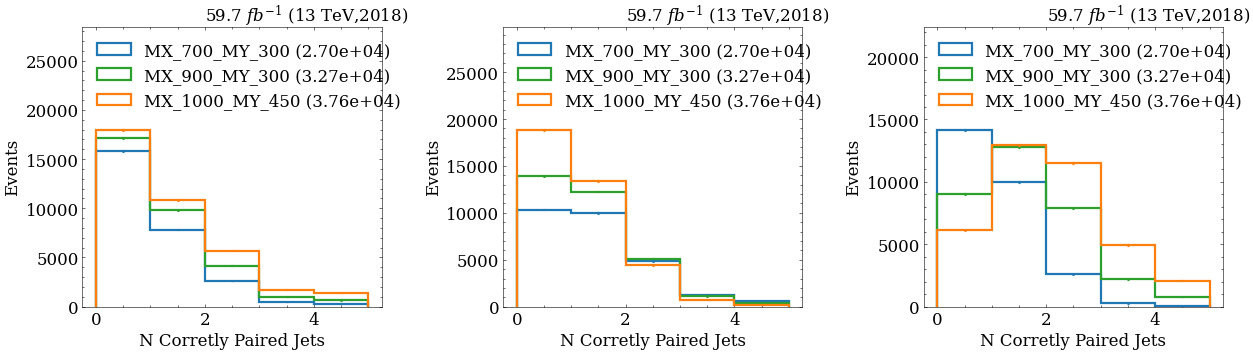

In [21]:
fig, axs = study.get_figax(3, dim=(-1,3))

study.quick(
  signal_asym,
  legend=True,
  varlist=['nfound_paired_h'],
  xlabels=['N Corretly Paired Jets'],
  figax=(fig,axs[0])
)

study.quick(
  signal_lowm,
  legend=True,
  varlist=['nfound_paired_h'],
  xlabels=['N Corretly Paired Jets'],
  figax=(fig,axs[1])
)

study.quick(
  signal_higm,
  legend=True,
  varlist=['nfound_paired_h'],
  xlabels=['N Corretly Paired Jets'],
  figax=(fig,axs[2])
)


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


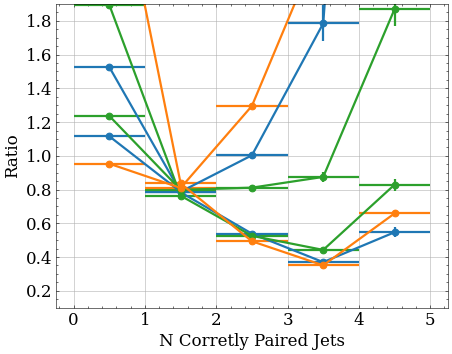

In [23]:
study.quick(
  signal_asym+signal_lowm+signal_higm,
  legend=True,
  varlist=['nfound_paired_h'],
  xlabels=['N Corretly Paired Jets'],

  histo=False,

  ratio=True, r_group=[(0,(3,6)),(1,(4,7)),(2,(5,8))]
)

100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


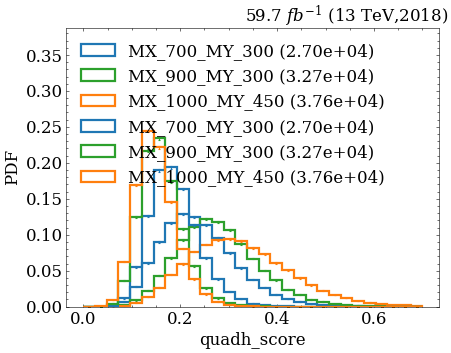

In [26]:
study.quick(
  signal_higm+signal_lowm, stacked=True, legend=True,
  varlist=['quadh_score'],
  binlist=[(0,0.7,30)],
  efficiency=True,
  saveas='quadh_score'
)

In [11]:
varinfo.clear()

In [12]:
varinfo.X_m = dict(bins=np.linspace(500,2000,30))
varinfo.Y1_m = dict(bins=np.linspace(0,1000,30))
varinfo.Y2_m = dict(bins=np.linspace(0,1000,30))
varinfo.H1Y1_m = dict(bins=np.linspace(0,250,30))
varinfo.H2Y1_m = dict(bins=np.linspace(0,250,30))
varinfo.H1Y2_m = dict(bins=np.linspace(0,250,30))
varinfo.H2Y2_m = dict(bins=np.linspace(0,250,30))

100%|██████████| 4/4 [00:00<00:00, 12.22it/s]


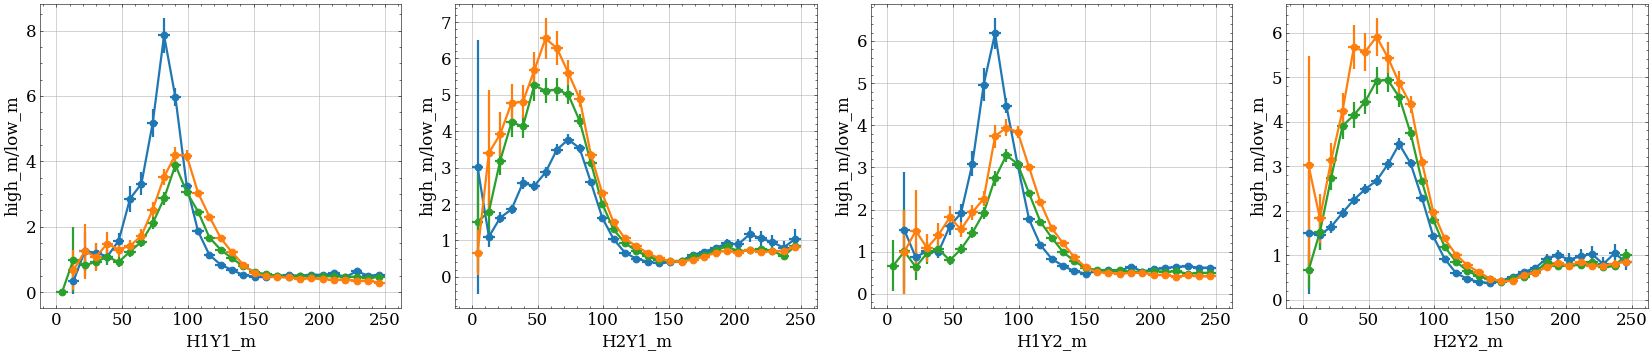

In [31]:
study.quick(
  signal_higm+signal_lowm, stacked=True, legend=True,
  varlist=[f'{obj}_m' for obj in eightb.higgslist],
  dim=(-1,4), 
  efficiency=True,
  histo=False,

  ratio=True,  r_group=[(0,(3,)),(1,(4,)),(2,(5,))], r_ylim=None,
  r_ylabel='high_m/low_m'
)

100%|██████████| 4/4 [00:06<00:00,  1.55s/it]


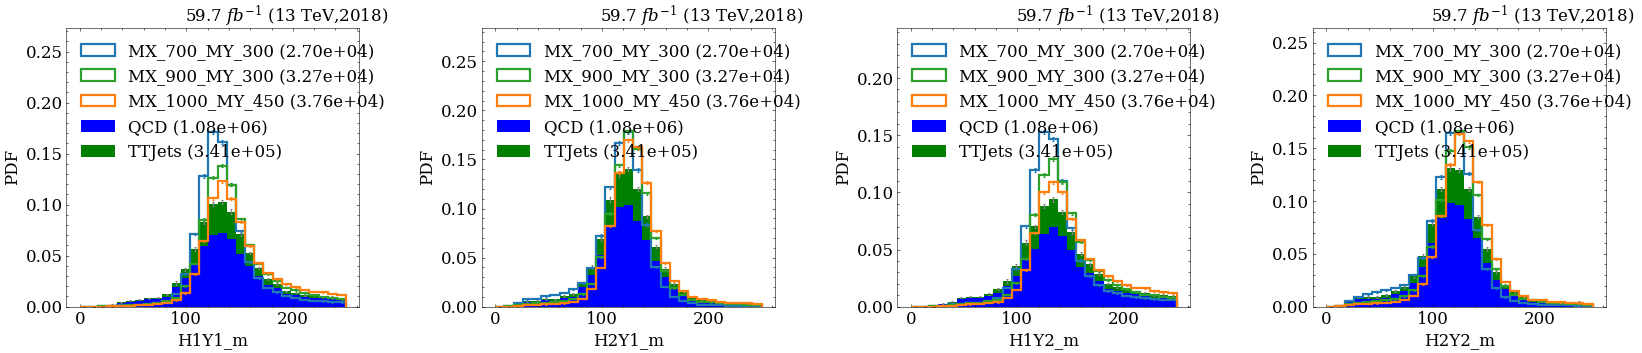

In [13]:
study.quick(
  signal+bkg, stacked=True, legend=True,
  varlist=[f'{obj}_m' for obj in eightb.higgslist],
  dim=(-1,4), 
  efficiency=True,
  saveas='quadh_m'
)

100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


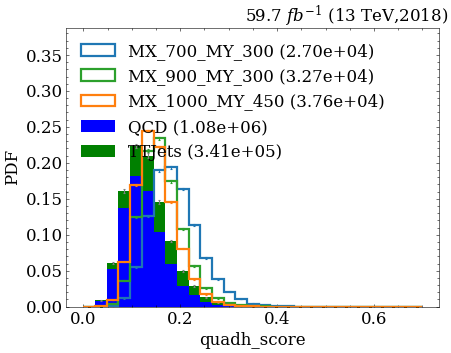

In [14]:
study.quick(
  signal+bkg, stacked=True, legend=True,
  varlist=['quadh_score'],
  binlist=[(0,0.7,30)],
  efficiency=True,
  saveas='quadh_score'
)

100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


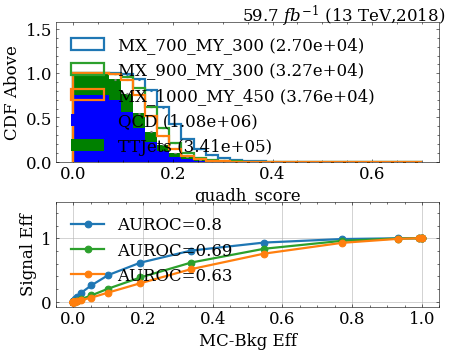

In [15]:
study.quick(
  signal+bkg, stacked=True, legend=True,
  varlist=['quadh_score'],
  binlist=[(0,0.7,30)],
  # histo=False,
  cumulative=-1,
  correlation=True,
  c_label_stat='AUROC={stats.area:0.2}',
  c_xlabel='MC-Bkg Eff',
  c_ylabel='Signal Eff',

  saveas='quadh_score_cut'
)